## We perform the following steps:
1. Data Collection
2. Data Preparation (Cleaning and Manipulating Data)
3. Prediction with the Model (Logistic Regression)

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [56]:
df = pd.read_csv('titanic_train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Data Dictionary
The dataset contains the following variables(Columns):

1. survival: Survival (0 = No, 1 = Yes)
2. pclass: Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd)
3. sex: Sex
4. age: Age in years
5. sibsp: # of siblings / spouses aboard the Titanic
6. parch: # of parents / children aboard the Titanic
7. ticket: Ticket number
8. fare: Passenger fare
9. cabin: Cabin number
10. embarked: Port of Embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)

In [57]:
# To check the null values in the dataset
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Checking the null values in the dataset using Heatmap

<Axes: >

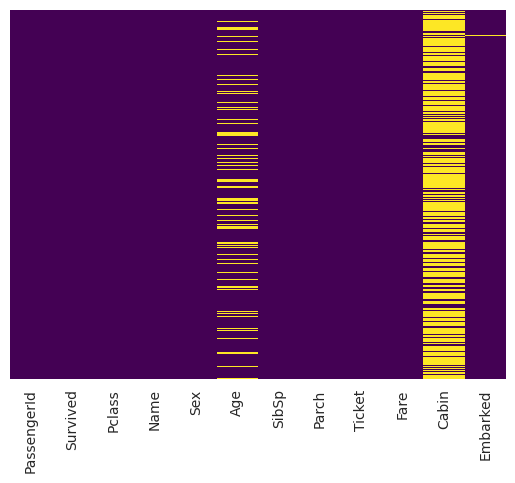

In [58]:
# yticklabels (False) means that the y-axis labels are not displayed 
sns.heatmap(df.isnull(), yticklabels= False, cbar= False, cmap = 'viridis') 

In [59]:
sns.set_style("whitegrid")

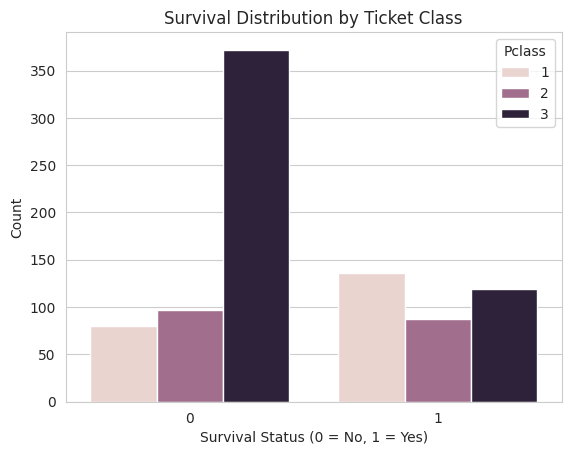

In [60]:
# plt.figure(figsize=(8, 6))
sns.countplot(x='Survived', hue='Pclass', data=df)  # palette='RdBu_r'
plt.title('Survival Distribution by Ticket Class')
plt.xlabel('Survival Status (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show() 

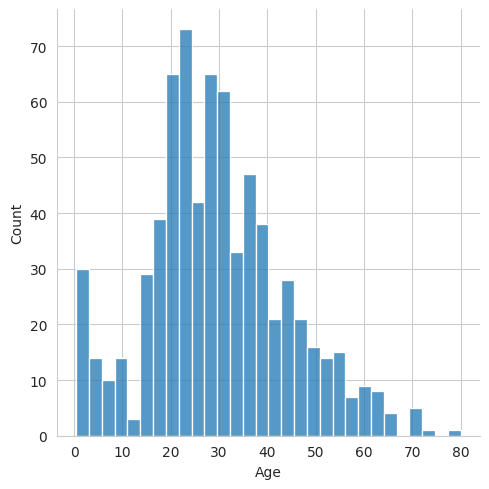

In [61]:
sns.displot(df['Age'].dropna(), bins = 30)

<Axes: xlabel='Age', ylabel='Frequency'>

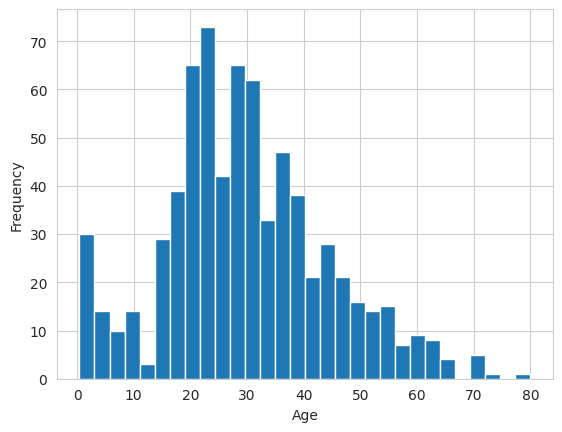

In [62]:
# same chart using pandas

df['Age'].plot.hist(bins = 30, xlabel = 'Age')

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<Axes: xlabel='SibSp', ylabel='count'>

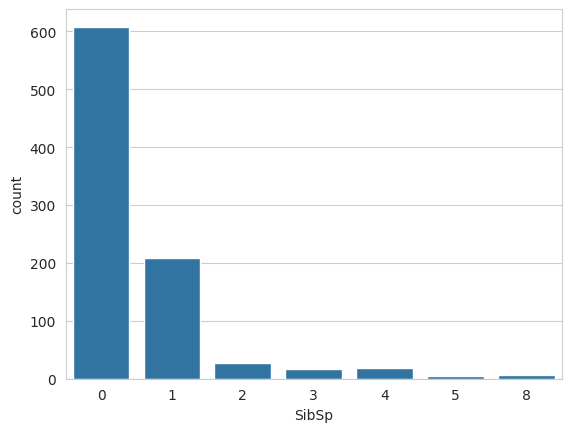

In [64]:
sns.countplot(x = 'SibSp', data = df)

<Axes: xlabel='Fare', ylabel='Frequency'>

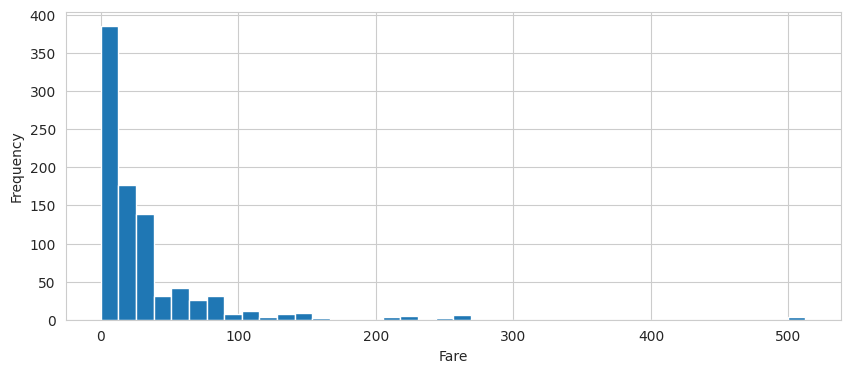

In [65]:
df['Fare'].plot.hist(bins = 40, figsize = (10,4) ,xlabel = 'Fare')

In [66]:
import cufflinks as cf
cf.go_offline()


In [67]:
#df['Fare'].iplot(kind = 'hist', bins = 50)

<Axes: xlabel='Pclass', ylabel='Age'>

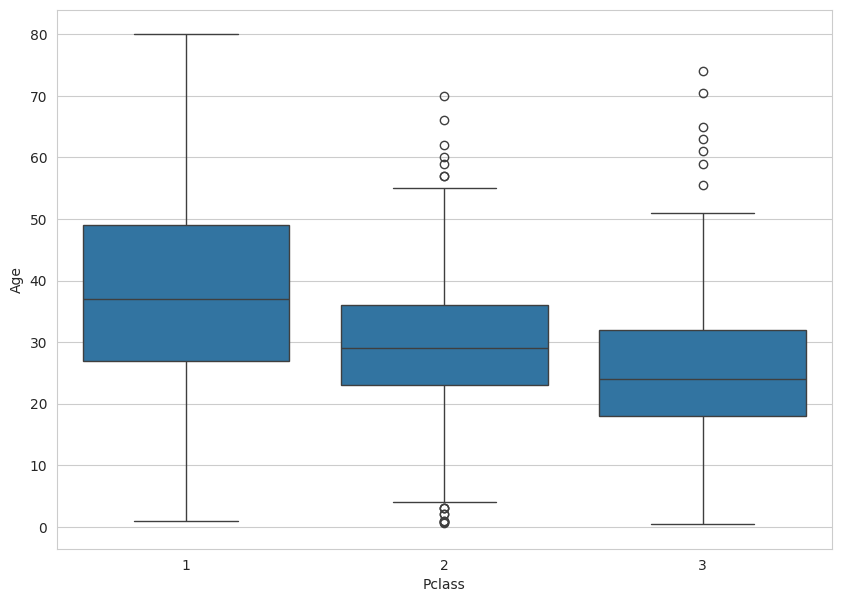

In [68]:
plt.figure(figsize=(10,7))
sns.boxplot(x = 'Pclass', y = 'Age', data = df)


In [69]:
# Here we created a function to impute missing values in the Age column of the dataframe
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [70]:
# Here we added the function impute_age() to the dataframe

df['Age'] = df[['Age', 'Pclass']].apply(impute_age, axis = 1)

/tmp/ipykernel_1724/1252536183.py:3: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_1724/1252536183.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



<Axes: >

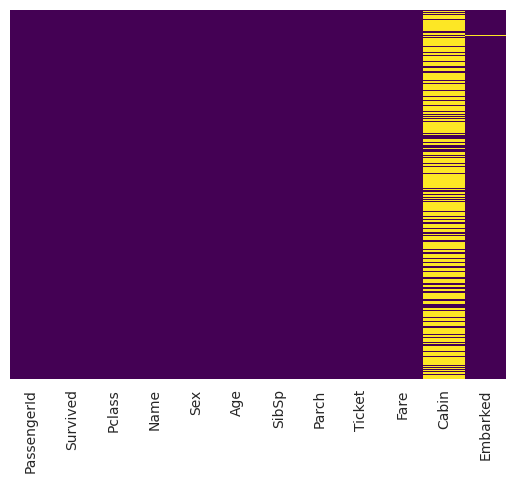

In [71]:
sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap = 'viridis') 

In [72]:
# Here we drop the cabin column from the dataframe
df.drop('Cabin', axis=1, inplace=True)



<Axes: >

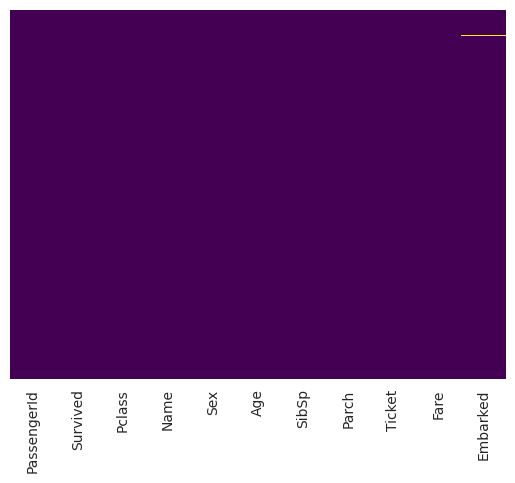

In [73]:
sns.heatmap(df.isnull(), yticklabels = False, cbar= False, cmap = 'viridis') 

In [74]:
# Here we drop the leftover missing values from the dataframe
df.dropna(inplace=True)

<Axes: >

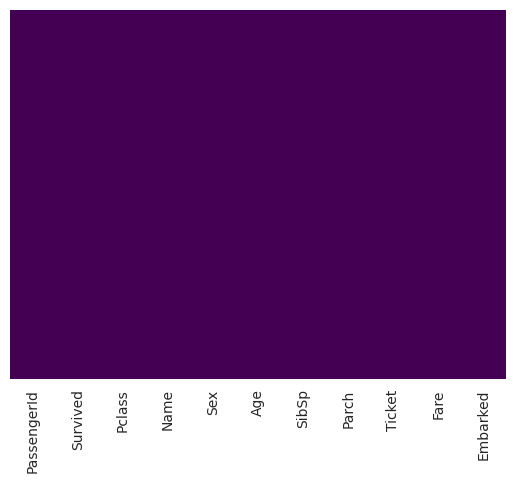

In [75]:
sns.heatmap(df.isnull(), yticklabels = False, cbar= False, cmap = 'viridis') 

In [76]:
sex = pd.get_dummies(df['Sex'] ,drop_first= True)
sex.head()


,male
0,True
1,False
2,False
3,False
4,True


In [77]:
# Here we created a dict() function to convert the boolean values to integer values

d = dict.fromkeys(sex.select_dtypes('bool').columns, 'int')
sex1 =  (pd.get_dummies(sex.astype(d)))

In [78]:
sex1.head()

,male
0,1
1,0
2,0
3,0
4,1


In [79]:
embark = pd.get_dummies(df['Embarked'],drop_first= True)
embark.head()

,Q,S
0,False,True
1,False,False
2,False,True
3,False,True
4,False,True


In [80]:
d2 = dict.fromkeys(embark.select_dtypes('bool').columns, 'int')
embark_real =  (pd.get_dummies(embark.astype(d2)))
embark_real.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [81]:
df = pd.concat([df, sex1, embark_real], axis = 1)

In [82]:
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0


In [83]:
df.drop(['Sex', 'Embarked', 'Name', 'Ticket', 'PassengerId'], axis = 1, inplace=True)

In [84]:
df.head(5)

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [85]:
X = df.drop('Survived', axis = 1)
y = df['Survived']

In [86]:
from sklearn.model_selection import train_test_split


In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)

In [88]:
from sklearn.linear_model import LogisticRegression

In [89]:
lm = LogisticRegression()

In [90]:
lm.fit(X_train, y_train)

/home/codespace/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [91]:
predictions = lm.predict(X_test)

In [92]:
from sklearn.metrics import classification_report


In [93]:
report = classification_report(y_test, predictions)

In [94]:
print(report)

              precision    recall  f1-score   support

           0       0.83      0.90      0.86       163
           1       0.82      0.71      0.76       104

    accuracy                           0.83       267
   macro avg       0.83      0.81      0.81       267
weighted avg       0.83      0.83      0.83       267



In [95]:
# If you wanna import the confusion matrix
from sklearn.metrics import confusion_matrix

In [96]:
cfm = confusion_matrix(y_test, predictions)

In [97]:
cfm

array([[147,  16],
       [ 30,  74]])